In [1]:
# numpy, matplotlib, seaborn, pandas
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Ignore warnings thrown by Seaborn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("train.csv")
test_df    = pd.read_csv("test.csv")

# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Understand the datatypes
print(titanic_df.dtypes)
print('_'*40)
# Focus first on null values
print(titanic_df.isna().sum())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
________________________________________
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
titanic_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

In [5]:
print(test_df.dtypes)
print('_'*40)
print(test_df.isna().sum())

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


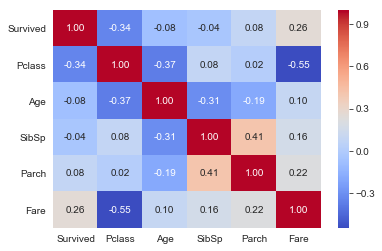

In [6]:
# Check the correlation for the current numeric feature set.
print(titanic_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr())
sns.heatmap(titanic_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


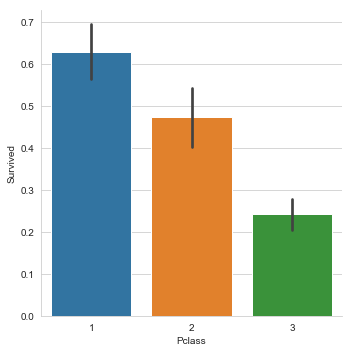

In [7]:
# Lets see the relation between Pclass and Survived
print(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
sns.catplot(x='Pclass', y='Survived',  kind='bar', data=titanic_df)

        Survived
Sex             
female  0.742038
male    0.188908


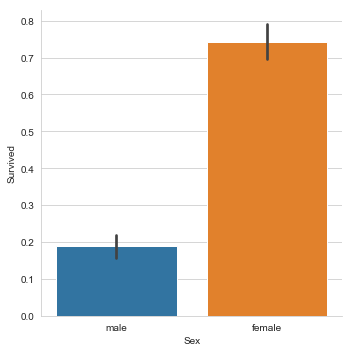

In [8]:
print(titanic_df[['Sex', 'Survived']].groupby(['Sex']).mean())
sns.catplot(x='Sex', y='Survived',  kind='bar', data=titanic_df)

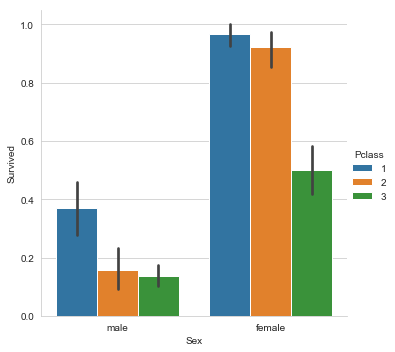

In [9]:
sns.catplot(x='Sex', y='Survived',  kind='bar', data=titanic_df, hue='Pclass')

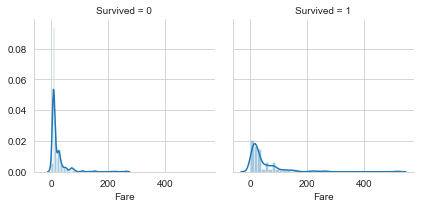

In [10]:
g = sns.FacetGrid(titanic_df, col='Survived')
g = g.map(sns.distplot, "Fare")

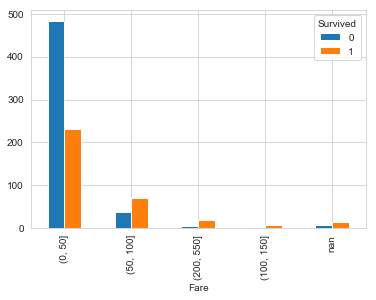

In [11]:
group = pd.cut(titanic_df.Fare, [0,50,100,150,200,550])
piv_fare = titanic_df.pivot_table(index=group, columns='Survived', values = 'Fare', aggfunc='count')
piv_fare.plot(kind='bar')

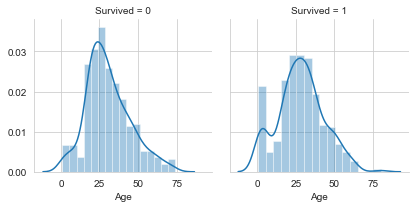

In [12]:
g = sns.FacetGrid(titanic_df, col='Survived')
g = g.map(sns.distplot, "Age")

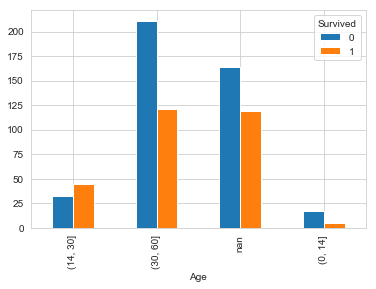

In [13]:
group = pd.cut(titanic_df.Age, [0,14,30,60,100])
piv_fare = titanic_df.pivot_table(index=group, columns='Survived', values = 'Age', aggfunc='count')
piv_fare.plot(kind='bar')

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


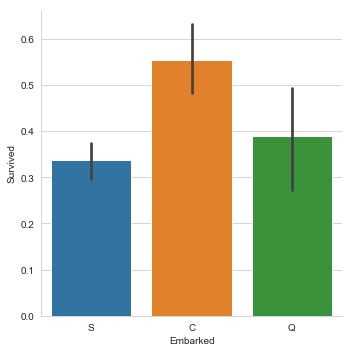

In [14]:
print(titanic_df[['Embarked', 'Survived']].groupby(['Embarked']).mean())
sns.catplot(x='Embarked', y='Survived',  kind='bar', data=titanic_df)

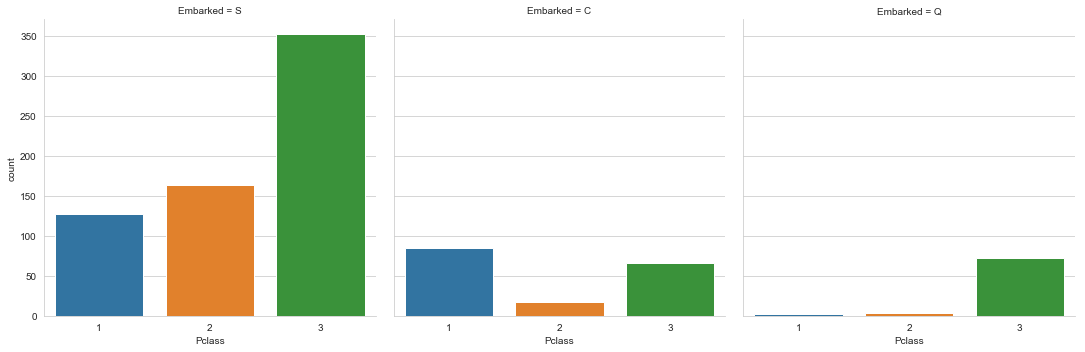

In [15]:
sns.catplot('Pclass', kind='count', col='Embarked', data=titanic_df)

       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000


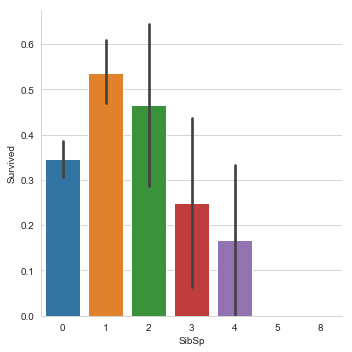

In [16]:
print(titanic_df[['SibSp', 'Survived']].groupby(['SibSp']).mean())
sns.catplot(x='SibSp', y='Survived', data=titanic_df, kind='bar')

       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000


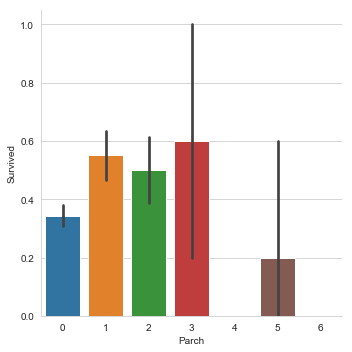

In [17]:
print(titanic_df[['Parch', 'Survived']].groupby(['Parch']).mean())
sns.catplot(x='Parch', y='Survived', data=titanic_df, kind='bar')

In [18]:
# Get the titles
for dataset in [titanic_df, test_df]:
    # Use split to get only the titles from the name
    dataset['Title'] = dataset['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
    # Check the initial list of titles.
    print(dataset['Title'].value_counts())
    print()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Sir               1
Don               1
Jonkheer          1
Lady              1
Mme               1
Ms                1
the Countess      1
Capt              1
Name: Title, dtype: int64

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64



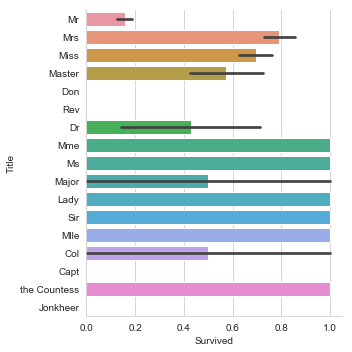

In [19]:
sns.catplot(x='Survived', y='Title', data=titanic_df, kind ='bar')

In [20]:
for df in [titanic_df, test_df]:
    print(df.shape)
    print()
    print(df.isna().sum())

(891, 13)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64
(418, 12)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [21]:
# Drop rows with nulls for Embarked
for df in [titanic_df, test_df]:
    df.dropna(subset = ['Embarked'], inplace = True)

In [22]:
test_df['Fare'].fillna(test_df[test_df['Pclass'] == 3].Fare.median(), inplace = True)

In [23]:
# Returns titles from the passed in series.
def getTitle(series):
    return series.str.split(',').str[1].str.split('.').str[0].str.strip()
# Prints the count of titles with nulls for the train dataframe.
print(getTitle(titanic_df[titanic_df.Age.isnull()].Name).value_counts())
# Fill Age median based on Title
mr_mask = titanic_df['Title'] == 'Mr'
miss_mask = titanic_df['Title'] == 'Miss'
mrs_mask = titanic_df['Title'] == 'Mrs'
master_mask = titanic_df['Title'] == 'Master'
dr_mask = titanic_df['Title'] == 'Dr'
titanic_df.loc[mr_mask, 'Age'] = titanic_df.loc[mr_mask, 'Age'].fillna(titanic_df[titanic_df.Title == 'Mr'].Age.mean())
titanic_df.loc[miss_mask, 'Age'] = titanic_df.loc[miss_mask, 'Age'].fillna(titanic_df[titanic_df.Title == 'Miss'].Age.mean())
titanic_df.loc[mrs_mask, 'Age'] = titanic_df.loc[mrs_mask, 'Age'].fillna(titanic_df[titanic_df.Title == 'Mrs'].Age.mean())
titanic_df.loc[master_mask, 'Age'] = titanic_df.loc[master_mask, 'Age'].fillna(titanic_df[titanic_df.Title == 'Master'].Age.mean())
titanic_df.loc[dr_mask, 'Age'] = titanic_df.loc[dr_mask, 'Age'].fillna(titanic_df[titanic_df.Title == 'Dr'].Age.mean())
print(getTitle(titanic_df[titanic_df.Age.isnull()].Name).value_counts())

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: Name, dtype: int64
Series([], Name: Name, dtype: int64)


In [24]:
# Prints the count of titles with nulls for the validation dataframe.
print(getTitle(test_df[test_df.Age.isnull()].Name).value_counts())
# Fill Age median based on Title
mr_mask = test_df['Title'] == 'Mr'
miss_mask = test_df['Title'] == 'Miss'
mrs_mask = test_df['Title'] == 'Mrs'
master_mask = test_df['Title'] == 'Master'
ms_mask = test_df['Title'] == 'Ms'
test_df.loc[mr_mask, 'Age'] = test_df.loc[mr_mask, 'Age'].fillna(test_df[test_df.Title == 'Mr'].Age.mean())
test_df.loc[miss_mask, 'Age'] = test_df.loc[miss_mask, 'Age'].fillna(test_df[test_df.Title == 'Miss'].Age.mean())
test_df.loc[mrs_mask, 'Age'] = test_df.loc[mrs_mask, 'Age'].fillna(test_df[test_df.Title == 'Mrs'].Age.mean())
test_df.loc[master_mask, 'Age'] = test_df.loc[master_mask, 'Age'].fillna(test_df[test_df.Title == 'Master'].Age.mean())
test_df.loc[ms_mask, 'Age'] = test_df.loc[ms_mask, 'Age'].fillna(test_df[test_df.Title == 'Miss'].Age.mean())
print(getTitle(test_df[test_df.Age.isnull()].Name).value_counts())

Mr        57
Miss      14
Mrs       10
Master     4
Ms         1
Name: Name, dtype: int64
Series([], Name: Name, dtype: int64)


In [25]:
print(titanic_df.isna().sum())
print(test_df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64


In [26]:
titanic_df.drop(columns=['PassengerId'], inplace = True)
[df.drop(columns=['Ticket'], inplace = True) for df in [titanic_df, test_df]]

[None, None]

In [27]:
[titanic_df, test_df] = [pd.get_dummies(data = df, columns = ['Pclass', 'Sex', 'Embarked']) for df in [titanic_df, test_df]]

In [28]:
for df in [titanic_df, test_df]:
    df['HasCabin'] = df['Cabin'].notna().astype(int)
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] > 1).astype(int)

In [29]:
[df.drop(columns=['Cabin', 'SibSp', 'Parch'], inplace = True) for df in [titanic_df, test_df]]


[None, None]

In [30]:
titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss').replace('Ms', 'Miss').replace('Mme', 'Mrs').replace(['Dr', 'Major', 'Col', 'Rev', 'Lady', 'Jonkheer', 'Don', 'Sir', 'Dona', 'Capt', 'the Countess'], 'Special')
test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss').replace('Ms', 'Miss').replace('Mme', 'Mrs').replace(['Dr', 'Major', 'Col', 'Rev', 'Lady', 'Jonkheer', 'Don', 'Sir', 'Dona', 'Capt', 'the Countess'], 'Special')
[df.drop(columns=['Name'], inplace = True) for df in [titanic_df, test_df]]
[titanic_df, test_df] = [pd.get_dummies(data = df, columns = ['Title']) for df in [titanic_df, test_df]]

In [31]:
# Check the updated dataset
print(titanic_df.columns.values)
print(test_df.columns.values)

['Survived' 'Age' 'Fare' 'Pclass_1' 'Pclass_2' 'Pclass_3' 'Sex_female'
 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'HasCabin' 'FamilySize'
 'IsAlone' 'Title_Master' 'Title_Miss' 'Title_Mr' 'Title_Mrs'
 'Title_Special']
['PassengerId' 'Age' 'Fare' 'Pclass_1' 'Pclass_2' 'Pclass_3' 'Sex_female'
 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'HasCabin' 'FamilySize'
 'IsAlone' 'Title_Master' 'Title_Miss' 'Title_Mr' 'Title_Mrs'
 'Title_Special']


In [32]:
# Check the correlation with the updated datasets
titanic_df.corr()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,HasCabin,FamilySize,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Special
Survived,1.000000,-0.094463,0.255290,0.282368,0.095002,-0.320171,0.541585,-0.541585,0.169966,0.004536,-0.151777,0.313435,0.018277,0.206207,0.085998,0.334953,-0.547689,0.340870,-0.011611
Age,-0.094463,1.000000,0.088161,0.328319,0.008113,-0.288885,-0.123631,0.123631,0.042936,-0.047523,-0.007704,0.230972,-0.280536,-0.194362,-0.411971,-0.307879,0.237607,0.179084,0.193169
Fare,0.255290,0.088161,1.000000,0.590576,-0.117609,-0.411932,0.179958,-0.179958,0.270731,-0.116684,-0.163758,0.480425,0.218658,0.274079,0.011390,0.118352,-0.181692,0.105511,0.016645
Pclass_1,0.282368,0.328319,0.590576,1.000000,-0.287653,-0.625395,0.093142,-0.093142,0.299472,-0.154680,-0.165022,0.787224,-0.044054,0.117091,-0.084138,0.017584,-0.093084,0.090147,0.156844
Pclass_2,0.095002,0.008113,-0.117609,-0.287653,1.000000,-0.567432,0.066459,-0.066459,-0.126039,-0.127705,0.190824,-0.171006,-0.039263,0.038178,0.009658,-0.021130,-0.090085,0.120833,0.056659
Pclass_3,-0.320171,-0.288885,-0.411932,-0.625395,-0.567432,1.000000,-0.134227,0.134227,-0.154785,0.237035,-0.013594,-0.537496,0.069865,-0.131775,0.064470,0.002098,0.153426,-0.175953,-0.181011
Sex_female,0.541585,-0.123631,0.179958,0.093142,0.066459,-0.134227,1.000000,-1.000000,0.084520,0.075217,-0.121405,0.135589,0.203191,0.306985,-0.159612,0.694744,-0.866888,0.550071,-0.075300
Sex_male,-0.541585,0.123631,-0.179958,-0.093142,-0.066459,0.134227,-1.000000,1.000000,-0.084520,-0.075217,0.121405,-0.135589,-0.203191,-0.306985,0.159612,-0.694744,0.866888,-0.550071,0.075300
Embarked_C,0.169966,0.042936,0.270731,0.299472,-0.126039,-0.154785,0.084520,-0.084520,1.000000,-0.148646,-0.782613,0.211375,-0.046852,0.094513,-0.035471,0.037080,-0.073976,0.069249,0.029928
Embarked_Q,0.004536,-0.047523,-0.116684,-0.154680,-0.127705,0.237035,0.075217,-0.075217,-0.148646,1.000000,-0.499261,-0.128805,-0.059007,-0.087099,0.010330,0.168434,-0.079283,-0.090045,0.000198


In [33]:
# Use only the features with a coeefficient greater than 0.3
X = titanic_df[['Fare', 'Pclass_1', 'Pclass_3', 'Sex_female', 'Embarked_C', 'Embarked_S', 'HasCabin', 'IsAlone', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs']]
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
print(X_train.shape, X_test.shape)

(800, 12) (89, 12)


In [34]:
random_forest = RandomForestClassifier(n_estimators=1000)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

0.92625